In [ ]:
!pip install pyspark


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amarnadh9391521137","key":"27c83fad064e0c9bcab8fdae0a20f1b6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d okettaeneye/nypd-arrests-data-historic-2006-2020



Dataset URL: https://www.kaggle.com/datasets/okettaeneye/nypd-arrests-data-historic-2006-2020
License(s): DbCL-1.0
 92% 206M/223M [00:02<00:00, 79.1MB/s]
100% 223M/223M [00:03<00:00, 77.1MB/s]


In [ ]:
!unzip nypd-arrests-data-historic-2006-2020.zip


Archive:  nypd-arrests-data-historic-2006-2020.zip
  inflating: NYPD_Arrests_Data__Historic_.csv  


In [ ]:
import pandas as pd
arrest_df = pd.read_csv("/content/NYPD_Arrests_Data__Historic_.csv")
arrest_df


,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
1,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)
2,193260691,02/06/2019,NaN,NaN,NaN,NaN,PL 2203400,F,M,14,0.0,25-44,M,UNKNOWN,986685.0,215375.0,40.757839,-73.991212,POINT (-73.99121211099998 40.75783900300007)
3,149117452,01/06/2016,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0.0,25-44,M,BLACK,998032.0,175598.0,40.648650,-73.950336,POINT (-73.95033556299995 40.648650085000035)
4,190049060,11/15/2018,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153364,207601040,01/08/2020,273.0,"TAMPERING 1,CRIMINAL",121.0,CRIMINAL MISCHIEF & RELATED OF,PL 1452000,F,M,1,1.0,25-44,M,BLACK HISPANIC,980772.0,194845.0,40.701489,-74.012545,POINT (-74.01254496799999 40.70148881400007)
5153365,206891807,01/01/2020,113.0,"MENACING,UNCLASSIFIED",344.0,ASSAULT 3 & RELATED OFFENSES,PL 1201401,M,K,90,0.0,<18,M,BLACK,993514.0,197321.0,40.708281,-73.966587,POINT (-73.96658711699997 40.70828068800005)
5153366,207760542,01/11/2020,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,13,0.0,25-44,M,WHITE,986464.0,208227.0,40.738220,-73.992012,POINT (-73.99201218099995 40.73821959500003)
5153367,206896678,01/01/2020,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,111,0.0,45-64,M,BLACK,1053534.0,211808.0,40.747777,-73.749952,POINT (-73.74995244099993 40.74777741400004)


In [ ]:
filtered_df = arrest_df[['ARREST_DATE', 'PD_DESC', 'OFNS_DESC', 'LAW_CAT_CD', 'ARREST_BORO','ARREST_PRECINCT','AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'Latitude', 'Longitude']]
filtered_df

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,06/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,Q,27,18-24,M,BLACK,NaN,NaN
1,01/26/2019,SEXUAL ABUSE,SEX CRIMES,F,M,25,45-64,M,BLACK,40.800694,-73.941109
2,02/06/2019,NaN,NaN,F,M,14,25-44,M,UNKNOWN,40.757839,-73.991212
3,01/06/2016,RAPE 3,RAPE,F,K,67,25-44,M,BLACK,40.648650,-73.950336
4,11/15/2018,RAPE 1,RAPE,F,K,77,25-44,M,BLACK,40.674583,-73.930222
...,...,...,...,...,...,...,...,...,...,...,...
5153364,01/08/2020,"TAMPERING 1,CRIMINAL",CRIMINAL MISCHIEF & RELATED OF,F,M,1,25-44,M,BLACK HISPANIC,40.701489,-74.012545
5153365,01/01/2020,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,M,K,90,<18,M,BLACK,40.708281,-73.966587
5153366,01/11/2020,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,M,M,13,25-44,M,WHITE,40.738220,-73.992012
5153367,01/01/2020,STRANGULATION 1ST,FELONY ASSAULT,F,Q,111,45-64,M,BLACK,40.747777,-73.749952


In [ ]:
filtered_df['PERP_RACE'].value_counts()

,count
PERP_RACE,
BLACK,2502715
WHITE HISPANIC,1338275
WHITE,620640
BLACK HISPANIC,415263
ASIAN / PACIFIC ISLANDER,212687
UNKNOWN,51000
AMERICAN INDIAN/ALASKAN NATIVE,11426
OTHER,1363


In [ ]:
# Define a list of valid age groups
valid_age_groups = ["<18", "18-24", "25-44", "45-64", "65+"]

# Filter the DataFrame to keep only rows where AGE_GROUP is in the list of valid_age_groups
filtered_df = filtered_df[filtered_df['AGE_GROUP'].isin(valid_age_groups)]

filtered_df


,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,06/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,Q,27,18-24,M,BLACK,NaN,NaN
1,01/26/2019,SEXUAL ABUSE,SEX CRIMES,F,M,25,45-64,M,BLACK,40.800694,-73.941109
2,02/06/2019,NaN,NaN,F,M,14,25-44,M,UNKNOWN,40.757839,-73.991212
3,01/06/2016,RAPE 3,RAPE,F,K,67,25-44,M,BLACK,40.648650,-73.950336
4,11/15/2018,RAPE 1,RAPE,F,K,77,25-44,M,BLACK,40.674583,-73.930222
...,...,...,...,...,...,...,...,...,...,...,...
5153364,01/08/2020,"TAMPERING 1,CRIMINAL",CRIMINAL MISCHIEF & RELATED OF,F,M,1,25-44,M,BLACK HISPANIC,40.701489,-74.012545
5153365,01/01/2020,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,M,K,90,<18,M,BLACK,40.708281,-73.966587
5153366,01/11/2020,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,M,M,13,25-44,M,WHITE,40.738220,-73.992012
5153367,01/01/2020,STRANGULATION 1ST,FELONY ASSAULT,F,Q,111,45-64,M,BLACK,40.747777,-73.749952


In [ ]:
# Define a list of valid races
valid_races = ["BLACK", "WHITE HISPANIC", "WHITE", "BLACK HISPANIC",
               "ASIAN / PACIFIC ISLANDER", "AMERICAN INDIAN/ALASKAN NATIVE"]

filtered_df = filtered_df[filtered_df['PERP_RACE'].isin(valid_races)]

filtered_df


,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
0,06/18/2007,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,M,Q,27,18-24,M,BLACK,NaN,NaN
1,01/26/2019,SEXUAL ABUSE,SEX CRIMES,F,M,25,45-64,M,BLACK,40.800694,-73.941109
3,01/06/2016,RAPE 3,RAPE,F,K,67,25-44,M,BLACK,40.648650,-73.950336
4,11/15/2018,RAPE 1,RAPE,F,K,77,25-44,M,BLACK,40.674583,-73.930222
5,09/13/2006,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,M,K,77,45-64,M,BLACK,40.671254,-73.926714
...,...,...,...,...,...,...,...,...,...,...,...
5153364,01/08/2020,"TAMPERING 1,CRIMINAL",CRIMINAL MISCHIEF & RELATED OF,F,M,1,25-44,M,BLACK HISPANIC,40.701489,-74.012545
5153365,01/01/2020,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,M,K,90,<18,M,BLACK,40.708281,-73.966587
5153366,01/11/2020,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,M,M,13,25-44,M,WHITE,40.738220,-73.992012
5153367,01/01/2020,STRANGULATION 1ST,FELONY ASSAULT,F,Q,111,45-64,M,BLACK,40.747777,-73.749952


In [ ]:
filtered_df.dropna()

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
1,01/26/2019,SEXUAL ABUSE,SEX CRIMES,F,M,25,45-64,M,BLACK,40.800694,-73.941109
3,01/06/2016,RAPE 3,RAPE,F,K,67,25-44,M,BLACK,40.648650,-73.950336
4,11/15/2018,RAPE 1,RAPE,F,K,77,25-44,M,BLACK,40.674583,-73.930222
5,09/13/2006,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,M,K,77,45-64,M,BLACK,40.671254,-73.926714
6,10/24/2018,RAPE 3,RAPE,F,M,5,45-64,M,WHITE HISPANIC,40.716196,-73.997491
...,...,...,...,...,...,...,...,...,...,...,...
5153364,01/08/2020,"TAMPERING 1,CRIMINAL",CRIMINAL MISCHIEF & RELATED OF,F,M,1,25-44,M,BLACK HISPANIC,40.701489,-74.012545
5153365,01/01/2020,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,M,K,90,<18,M,BLACK,40.708281,-73.966587
5153366,01/11/2020,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,M,M,13,25-44,M,WHITE,40.738220,-73.992012
5153367,01/01/2020,STRANGULATION 1ST,FELONY ASSAULT,F,Q,111,45-64,M,BLACK,40.747777,-73.749952


In [ ]:
filtered_df = filtered_df.dropna(subset=['Latitude'])

In [ ]:
filtered_df['Longitude'].unique()

array([-73.94110929, -73.95033556, -73.93022154, ..., -73.85889672,
       -73.7908919 , -73.90970635])

In [ ]:
filtered_df.drop_duplicates()

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude
1,01/26/2019,SEXUAL ABUSE,SEX CRIMES,F,M,25,45-64,M,BLACK,40.800694,-73.941109
3,01/06/2016,RAPE 3,RAPE,F,K,67,25-44,M,BLACK,40.648650,-73.950336
4,11/15/2018,RAPE 1,RAPE,F,K,77,25-44,M,BLACK,40.674583,-73.930222
5,09/13/2006,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,M,K,77,45-64,M,BLACK,40.671254,-73.926714
6,10/24/2018,RAPE 3,RAPE,F,M,5,45-64,M,WHITE HISPANIC,40.716196,-73.997491
...,...,...,...,...,...,...,...,...,...,...,...
5153364,01/08/2020,"TAMPERING 1,CRIMINAL",CRIMINAL MISCHIEF & RELATED OF,F,M,1,25-44,M,BLACK HISPANIC,40.701489,-74.012545
5153365,01/01/2020,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,M,K,90,<18,M,BLACK,40.708281,-73.966587
5153366,01/11/2020,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,M,M,13,25-44,M,WHITE,40.738220,-73.992012
5153367,01/01/2020,STRANGULATION 1ST,FELONY ASSAULT,F,Q,111,45-64,M,BLACK,40.747777,-73.749952


In [ ]:
arrest_df=filtered_df

In [ ]:
# Save the DataFrame to the current working directory
arrest_df.to_csv('NYPD_ARREST_DATA.csv', index=False)


In [ ]:
arrest_df.head(10);

<ipython-input-19-4984d3a86afc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrest_df['ARREST_DATE'] = pd.to_datetime(arrest_df['ARREST_DATE'])
<ipython-input-19-4984d3a86afc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrest_df['Year'] = arrest_df['ARREST_DATE'].dt.year
<ipython-input-19-4984d3a86afc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

<Axes: title={'center': 'Monthly Arrest Trends'}, xlabel='Month'>

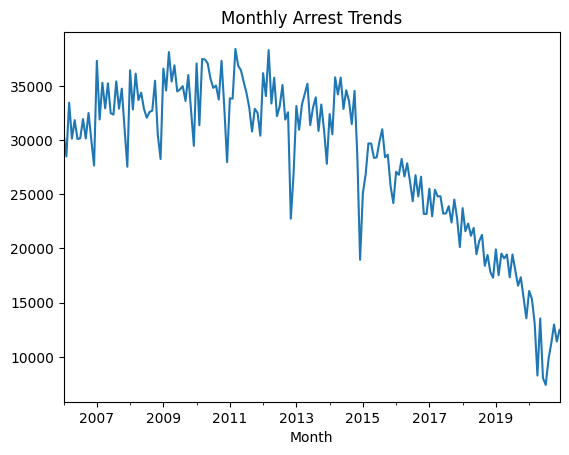

In [ ]:
_# Convert 'ARREST_DATE' to datetime format if it's not already
arrest_df['ARREST_DATE'] = pd.to_datetime(arrest_df['ARREST_DATE'])

# Extract year and month for grouping
arrest_df['Year'] = arrest_df['ARREST_DATE'].dt.year
arrest_df['Month'] = arrest_df['ARREST_DATE'].dt.to_period('M')

# Number of arrests per month
monthly_arrests = arrest_df.groupby('Month').size()
monthly_arrests.plot(kind='line', title='Monthly Arrest Trends')


OFNS_DESC
DANGEROUS DRUGS                    1080832
ASSAULT 3 & RELATED OFFENSES        511531
OTHER OFFENSES RELATED TO THEFT     301948
OTHER STATE LAWS                    239224
PETIT LARCENY                       219293
FELONY ASSAULT                      208622
VEHICLE AND TRAFFIC LAWS            201045
CRIMINAL TRESPASS                   199467
DANGEROUS WEAPONS                   196222
MISCELLANEOUS PENAL LAW             184399
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Offenses'}, xlabel='OFNS_DESC'>

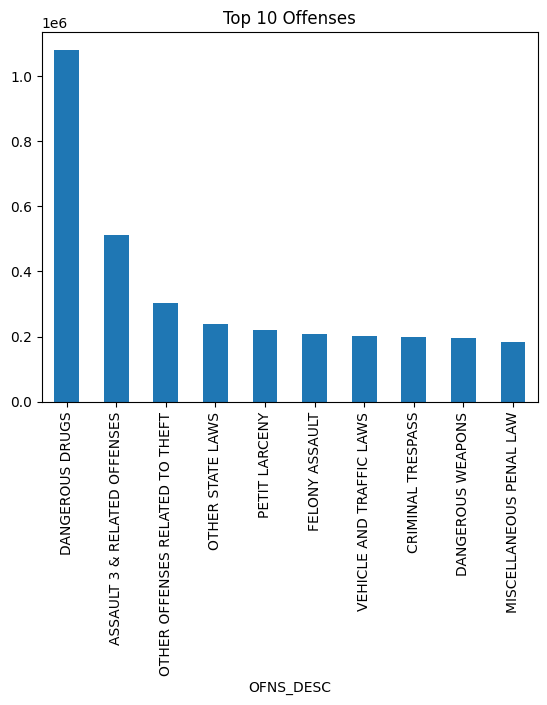

In [ ]:
# Top 10 offenses
top_offenses = arrest_df['OFNS_DESC'].value_counts().head(10)
print(top_offenses)

# Plotting
top_offenses.plot(kind='bar', title='Top 10 Offenses')


<Axes: title={'center': 'Law Category Distribution'}, ylabel='count'>

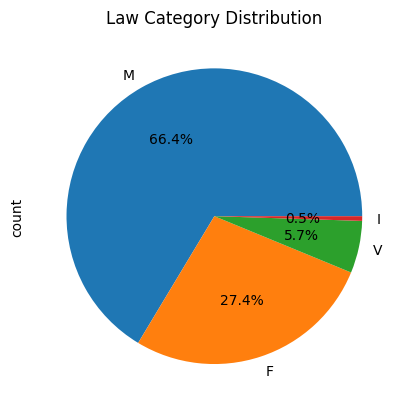

In [ ]:
# Law category distribution
law_category_counts = arrest_df['LAW_CAT_CD'].value_counts()
law_category_counts.plot(kind='pie', autopct='%1.1f%%', title='Law Category Distribution')


<Axes: title={'center': 'Arrests by Borough'}, xlabel='ARREST_BORO'>

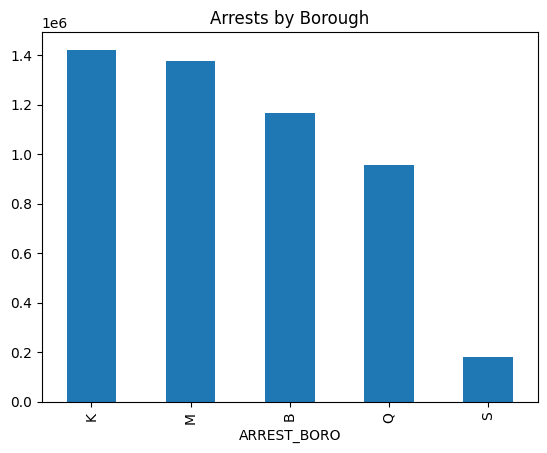

In [ ]:
# Arrests per borough
borough_counts = arrest_df['ARREST_BORO'].value_counts()
borough_counts.plot(kind='bar', title='Arrests by Borough')


<Axes: title={'center': 'Arrests by Age Group'}, xlabel='AGE_GROUP'>

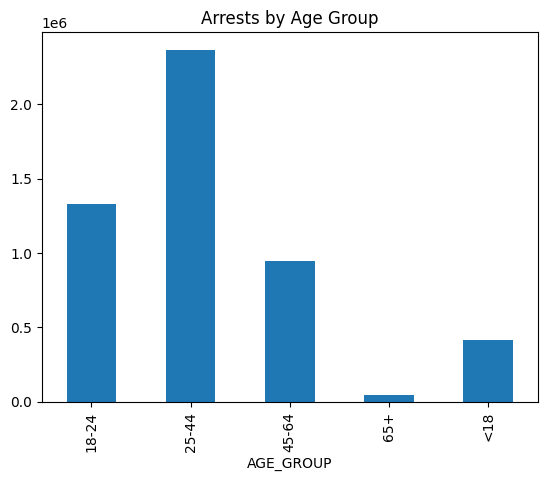

In [ ]:
# Age group distribution
age_group_counts = arrest_df['AGE_GROUP'].value_counts().sort_index()
age_group_counts.plot(kind='bar', title='Arrests by Age Group')


<Axes: title={'center': 'Arrests by Race'}, xlabel='PERP_RACE'>

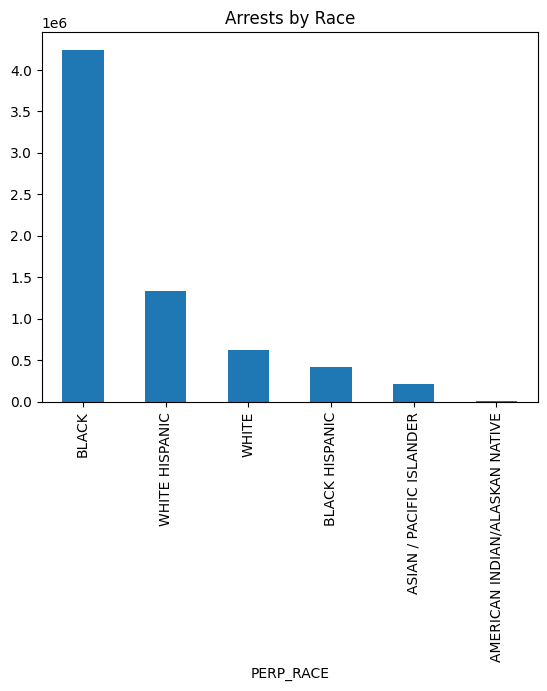

In [ ]:
# Arrests by sex
sex_counts = arrest_df['PERP_SEX'].value_counts()
sex_counts.plot(kind='bar', title='Arrests by Sex')

# Arrests by race
race_counts = arrest_df['PERP_RACE'].value_counts()
race_counts.plot(kind='bar', title='Arrests by Race')


In [ ]:
filtered_df['ARREST_BORO'].value_counts()

,count
ARREST_BORO,
K,1422265
M,1374988
B,1166238
Q,957008
S,180306


In [ ]:
clean_filter = (filtered_df.Latitude > 40) & (filtered_df.Latitude < 41) & (filtered_df.Longitude < -72) & (filtered_df.Longitude > -74.5)
cleandf = filtered_df[clean_filter]
# Manhattan Arrests
man_df = cleandf[cleandf['ARREST_BORO'] == 'M']
man_df.describe()

,ARREST_DATE,ARREST_PRECINCT,Latitude,Longitude,Year
count,1374372,1.374372e+06,1.374372e+06,1.374372e+06,1.374372e+06
mean,2012-07-12 03:19:09.205019136,1.909500e+01,4.077580e+01,-7.396857e+01,2.012045e+03
min,2006-01-01 00:00:00,1.000000e+00,4.063339e+01,-7.402699e+01,2.006000e+03
25%,2009-03-16 00:00:00,1.300000e+01,4.074082e+01,-7.399047e+01,2.009000e+03
50%,2012-04-18 00:00:00,1.900000e+01,4.076691e+01,-7.397352e+01,2.012000e+03
75%,2015-08-12 00:00:00,2.800000e+01,4.080778e+01,-7.394399e+01,2.015000e+03
max,2020-12-31 00:00:00,1.220000e+02,4.091505e+01,-7.382086e+01,2.020000e+03
std,NaN,1.004205e+01,4.219429e-02,2.531851e-02,3.931792e+00


In [ ]:
brook_df = cleandf[cleandf['ARREST_BORO'] == 'K']


<Axes: xlabel='Longitude', ylabel='Latitude'>

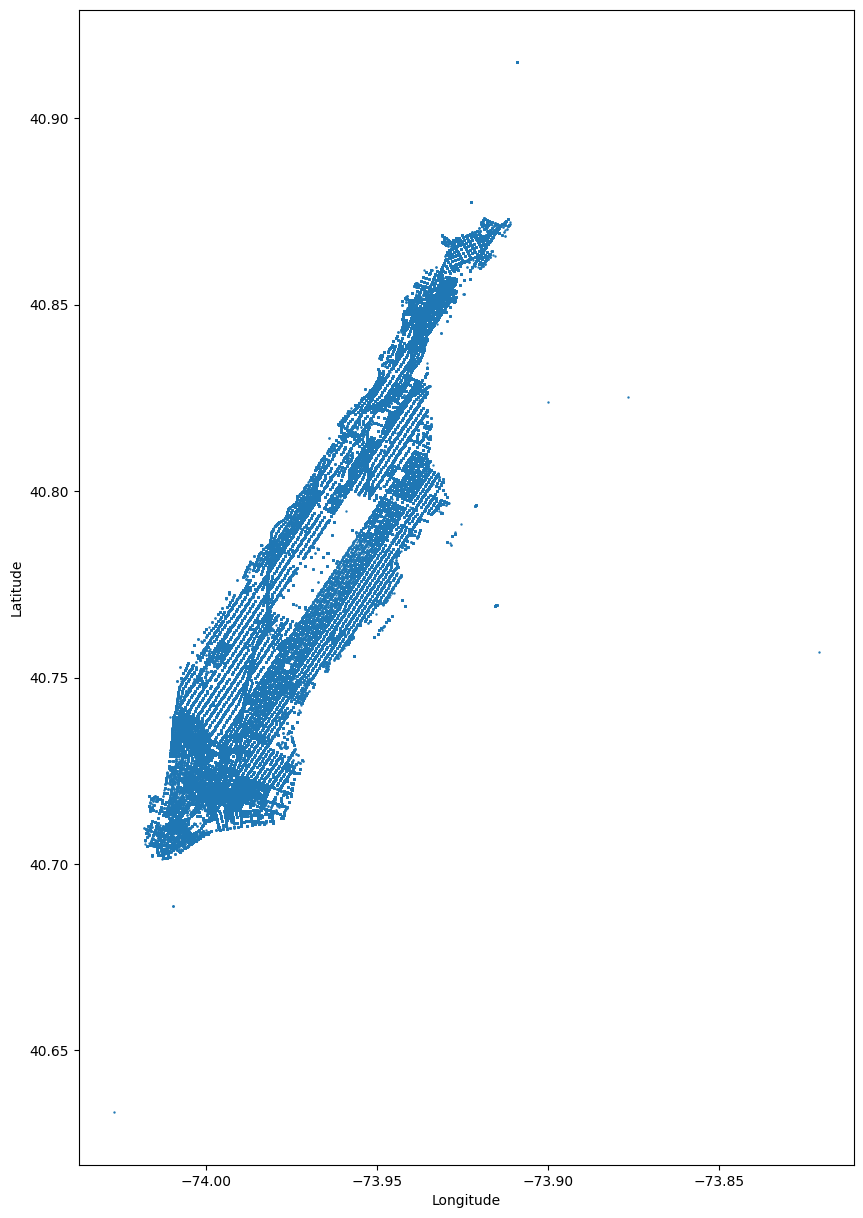

In [ ]:
man_df.plot (
    kind='scatter',
    x = 'Longitude',
    y = 'Latitude',
    figsize = (10,15),
    s = 0.5
)

<Axes: xlabel='Longitude', ylabel='Latitude'>

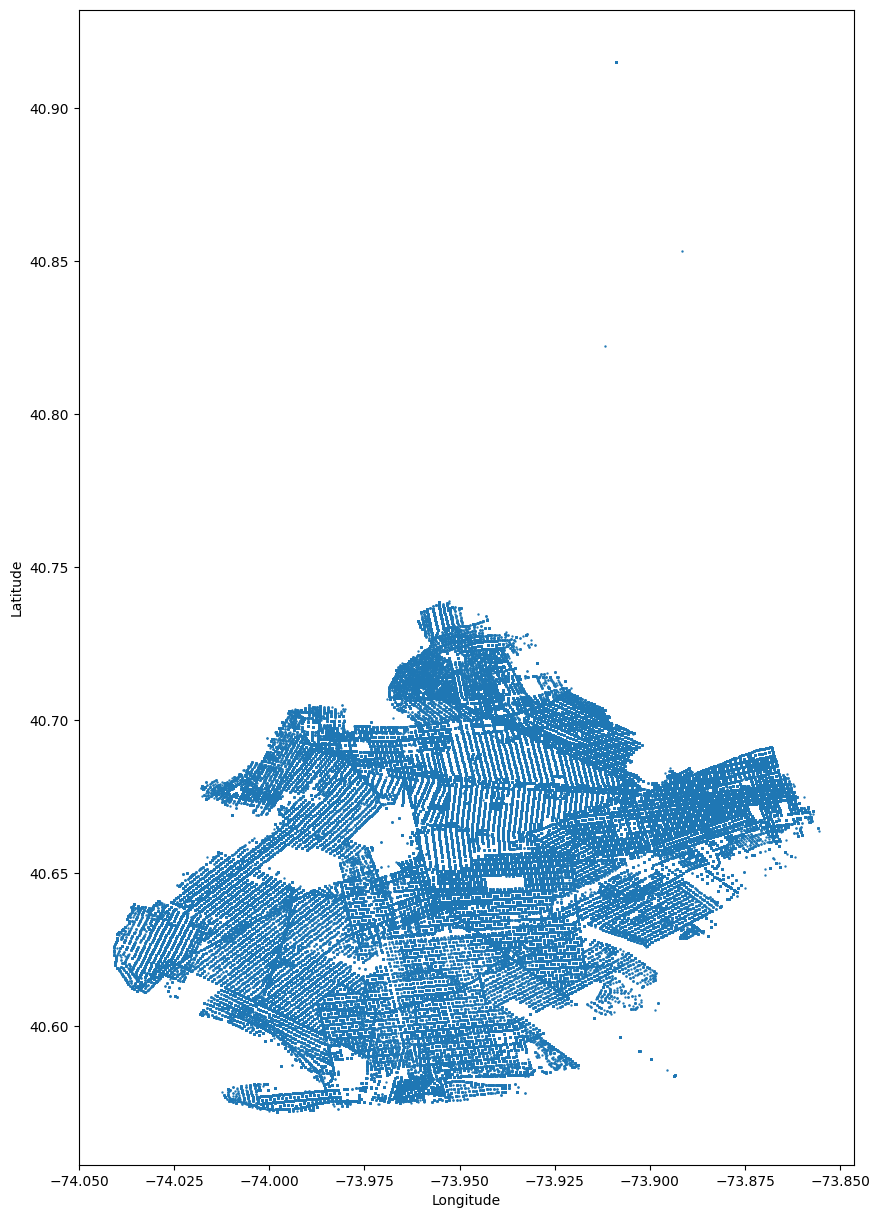

In [ ]:
brook_df.plot (
    kind='scatter',
    x = 'Longitude',
    y = 'Latitude',
    figsize = (10,15),
    s = 0.5
)

<Axes: xlabel='Longitude', ylabel='Latitude'>

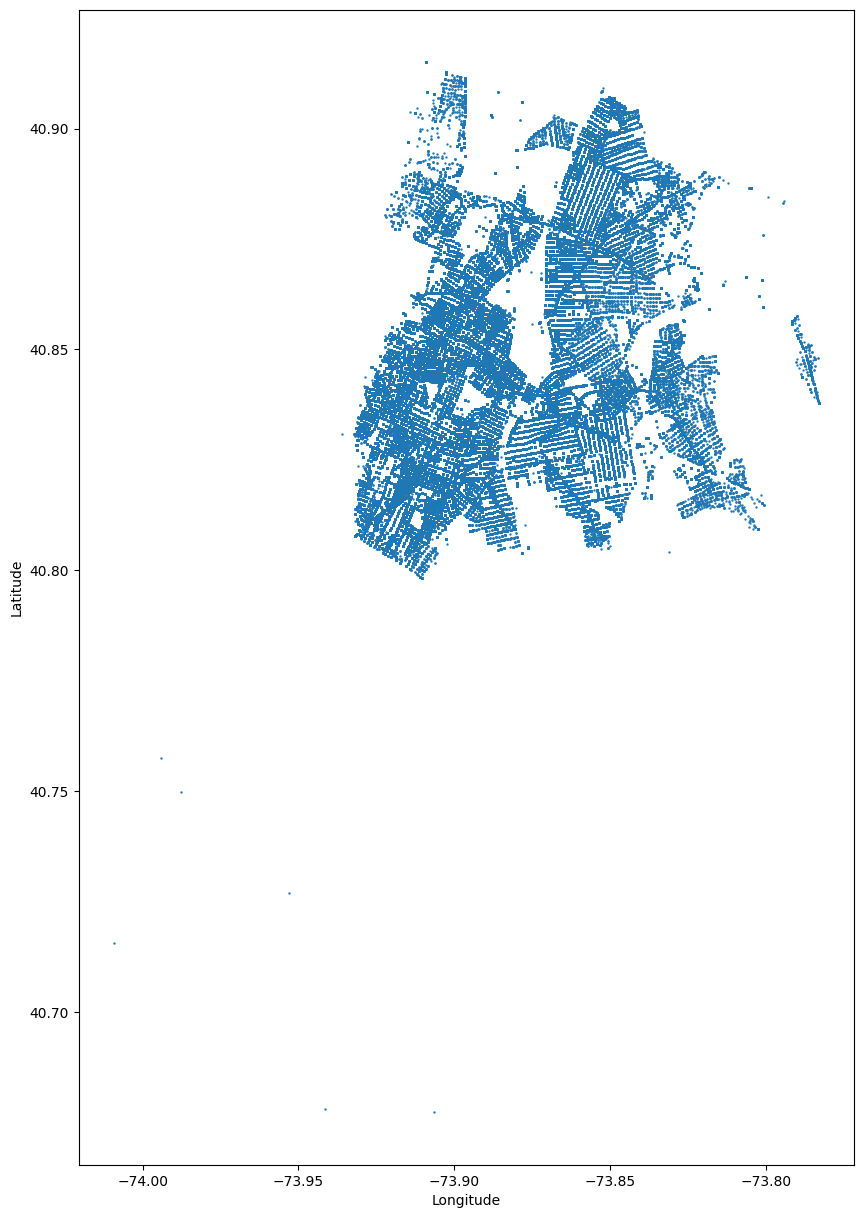

In [ ]:
bronx_df = cleandf[cleandf['ARREST_BORO'] == 'B']
bronx_df.plot (
    kind='scatter',
    x = 'Longitude',
    y = 'Latitude',
    figsize = (10,15),
    s = 0.5
)


<Axes: xlabel='Longitude', ylabel='Latitude'>

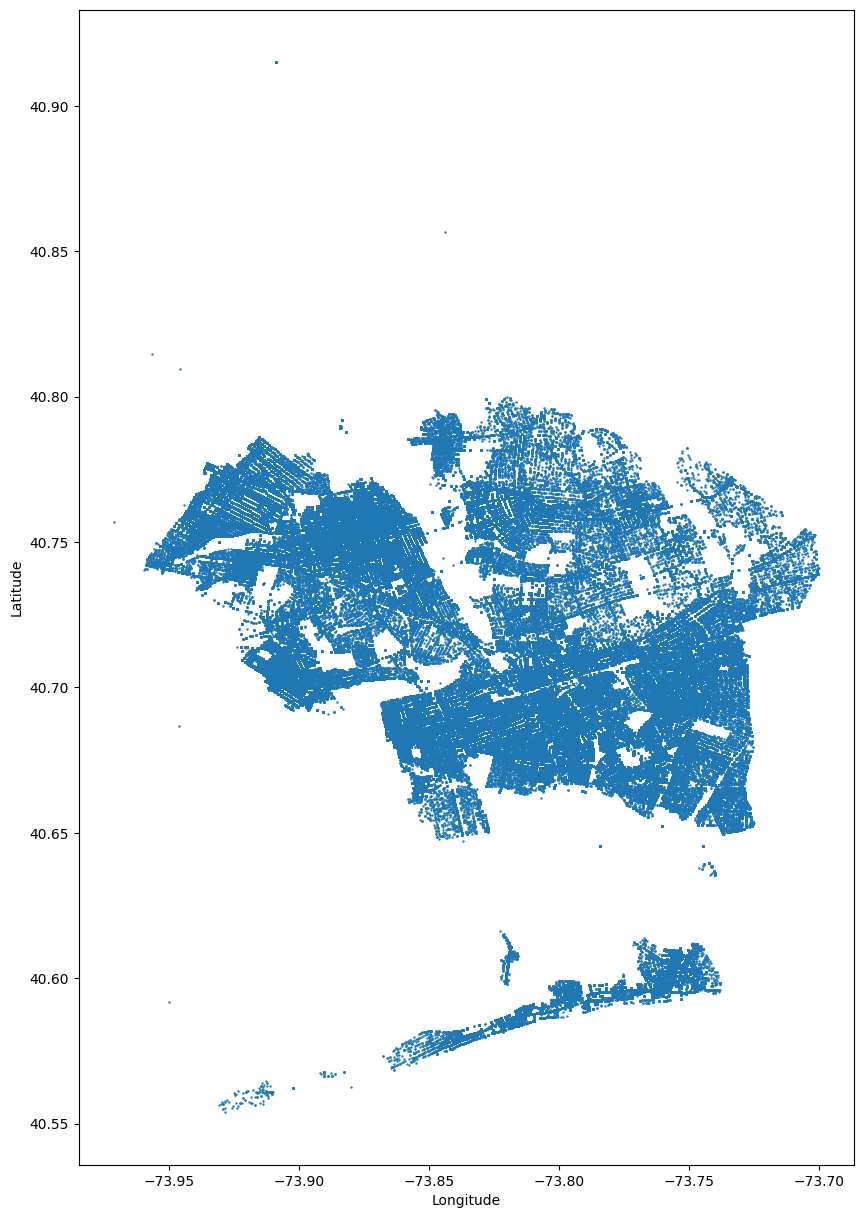

In [ ]:
queens_df = cleandf[cleandf['ARREST_BORO'] == 'Q']
queens_df.plot (
    kind='scatter',
    x = 'Longitude',
    y = 'Latitude',
    figsize = (10,15),
    s = 0.5
)

<Axes: xlabel='Longitude', ylabel='Latitude'>

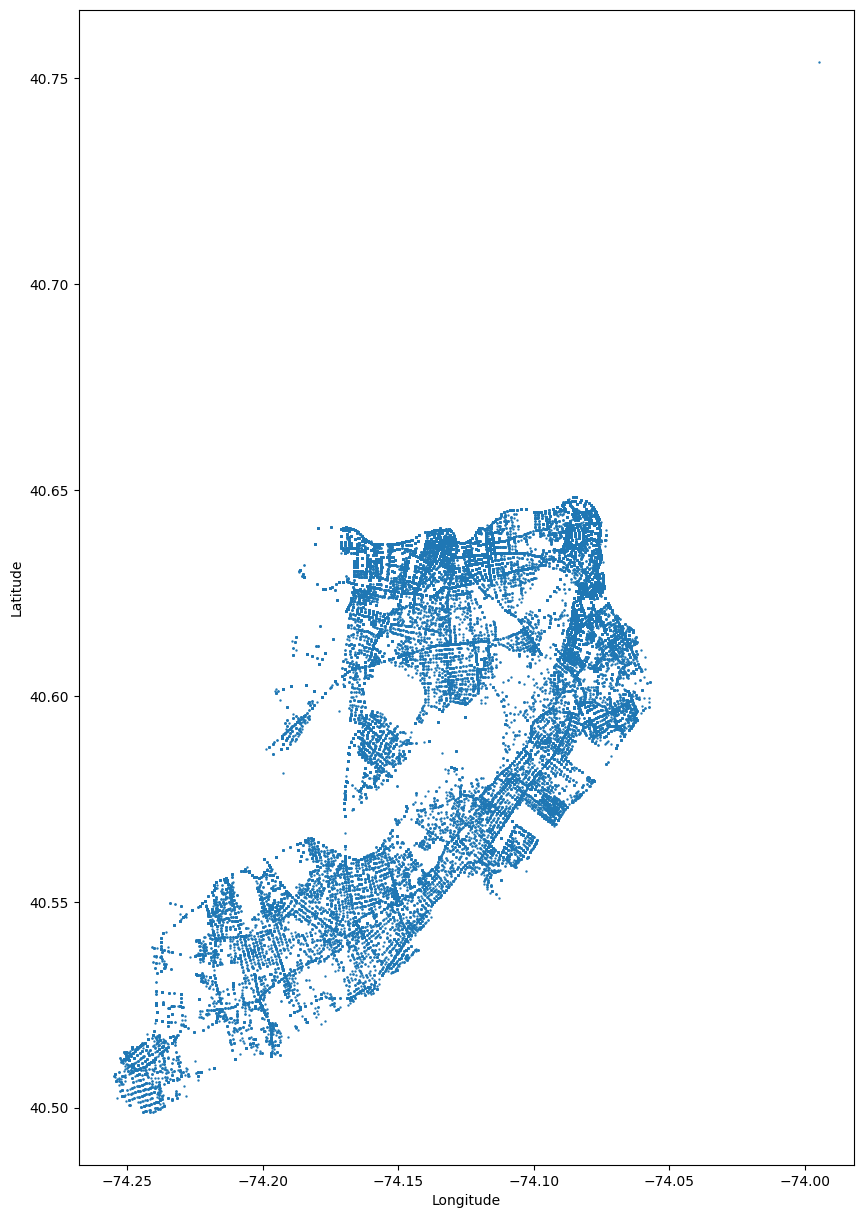

In [ ]:
staten_df = cleandf[cleandf['ARREST_BORO'] == 'S']
staten_df.plot (
    kind='scatter',
    x = 'Longitude',
    y = 'Latitude',
    figsize = (10,15),
    s = 0.5
)